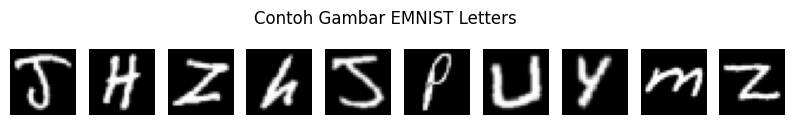

Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Train Accuracy: 1.0
Test Accuracy: 0.8596153846153847

Classification Report (Test Data):
              precision    recall  f1-score   support

           1     0.8947    0.8500    0.8718        20
           2     0.9412    0.8000    0.8649        20
           3     0.9091    1.0000    0.9524        20
           4     0.8500    0.8500    0.8500        20
           5     0.9000    0.9000    0.9000        20
           6     0.8095    0.8500    0.8293        20
           7     0.6400    0.8000    0.7111        20
           8     0.7273    0.8000    0.7619        20
           9     0.6800    0.8500    0.7556        20
          10     0.9000    0.9000    0.9000        20
          11     0.8571    0.9000    0.8780        20
          12     0.8333    0.7500    0.7895        20
          13     1.0000    0.9000    0.9474        20
          14     0.8125    0.6500    0.7222        20
          15     0.7917    0.9500

In [2]:
# EMNIST Letters Classification
# 1. Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from skimage.feature import hog
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

# 2. Load Dataset (CSV Format)
# Pastikan file 'emnist-letters-train.csv' ada di folder yang sama
data = pd.read_csv("emnist-letters-train.csv")

# 3. Ambil 2600 data (100 per class)
data = data.sample(frac=1).reset_index(drop=True)  # Shuffle
samples_per_class = 100
selected_data = pd.DataFrame()
for label in range(1, 27):  # EMNIST Letters class: 1-26
    class_data = data[data.iloc[:, 0] == label].head(samples_per_class)
    selected_data = pd.concat([selected_data, class_data])
selected_data = selected_data.sample(frac=1).reset_index(drop=True)

# 4. Visualisasi Beberapa Gambar
def plot_sample_images(df, n=10):
    plt.figure(figsize=(10, 1.5))
    for i in range(n):
        image = df.iloc[i, 1:].values.reshape(28, 28).T
        plt.subplot(1, n, i + 1)
        plt.imshow(image, cmap='gray')
        plt.axis('off')
    plt.suptitle("Contoh Gambar EMNIST Letters")
    plt.show()

plot_sample_images(selected_data)

# 5. Ekstraksi Fitur HOG
def extract_hog_features(images, orientations=9, pixels_per_cell=(4, 4), cells_per_block=(2, 2)):
    features = []
    for img in images:
        img = img.reshape(28, 28).T
        hog_feature = hog(img, orientations=orientations,
                          pixels_per_cell=pixels_per_cell,
                          cells_per_block=cells_per_block,
                          block_norm='L2-Hys')
        features.append(hog_feature)
    return np.array(features)

X = selected_data.iloc[:, 1:].values
y = selected_data.iloc[:, 0].values

hog_features = extract_hog_features(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(hog_features)

# 6. Split Data (80% Train - 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# 7. Grid Search untuk SVM
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# 8. Evaluasi Model
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))

print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_pred_test, digits=4))
